Get imports and data

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
file_path = 'https://github.com/rosenfa/ai/blob/master/news-israel.xlsx?raw=true'
file_path_pal = 'https://github.com/rosenfa/ai/blob/master/news-pal.xlsx?raw=true'
df_israel = pd.read_excel(file_path)
df_pal = pd.read_excel(file_path_pal)

In [2]:
content_pal = df_pal['Content']
content_isr = df_israel['Content']

In [4]:
content_isr[0]

'"06:30," a documentary project filmed in Tel Aviv last week, will recreate the horrors of the Hamas massacre in southern Israel on October 7 through miniature sets and the testimonies of 10 survivors'

In [76]:
# Combine all the text into a single string
all_text_pal = ' '.join(content_pal.dropna())
all_text_isr = ' '.join(content_isr.dropna())



**Remove any charachter that is not a number or a letter. There is no need for things like !\@#**

In [77]:
import re
# Define a function to remove non-alphanumeric characters
def remove_special_characters(text):
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

all_text_pal = remove_special_characters(all_text_pal)
all_text_isr = remove_special_characters(all_text_isr)

**Create a function that will format and create the wordcloud properly**

In [78]:
def createCloud(vectorizer,text):
  X = vectorizer.fit_transform([text])
  feature_names = vectorizer.get_feature_names_out()
  # Create a dictionary with words and their corresponding frequencies
  word_frequencies = dict(zip(feature_names, X.toarray()[0]))
  # Create a WordCloud object
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

  # Display the WordCloud using matplotlib
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

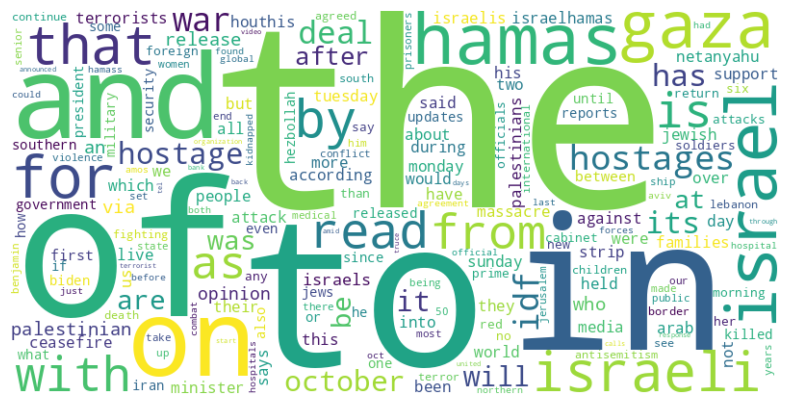

In [79]:
# Use CountVectorizer to preprocess the text
vectorizer = CountVectorizer()
createCloud(vectorizer,all_text_isr)

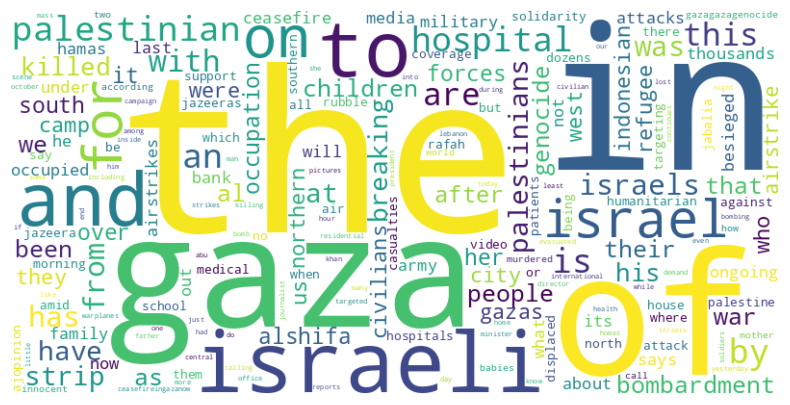

In [80]:
createCloud(vectorizer,all_text_pal)

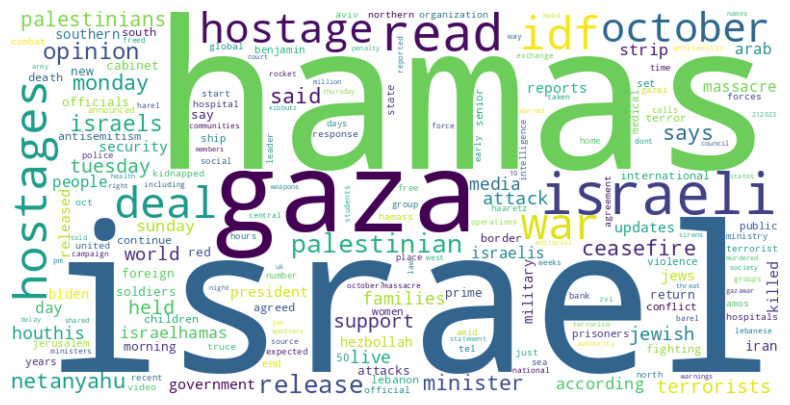

In [81]:
vectorizer = CountVectorizer(stop_words='english')
createCloud(vectorizer,all_text_isr)

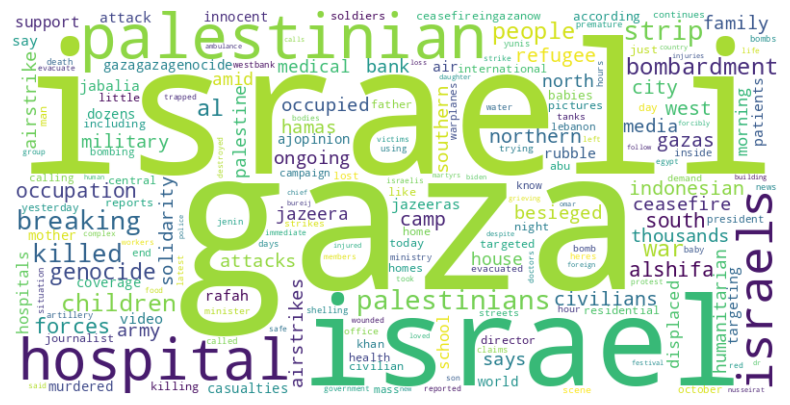

In [82]:
createCloud(vectorizer,all_text_pal)

In [83]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
# Download the punkt tokenizer models
nltk.download('punkt')
nltk.download('wordnet')
# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()


# Define a custom tokenizer that uses Porter Stemmer
def custom_tokenizer(text):
    words = word_tokenize(text)
    stemmed_words = [porter_stemmer.stem(word) for word in words]
    return stemmed_words


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', '

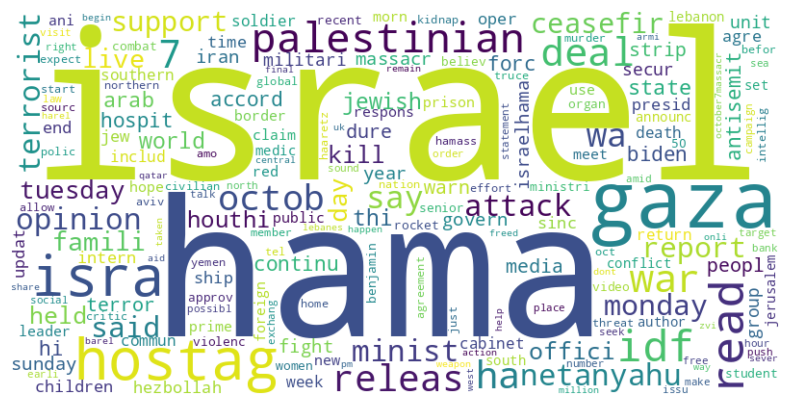

In [84]:
vectorizer = CountVectorizer(stop_words='english', tokenizer= custom_tokenizer)
createCloud(vectorizer,all_text_isr)

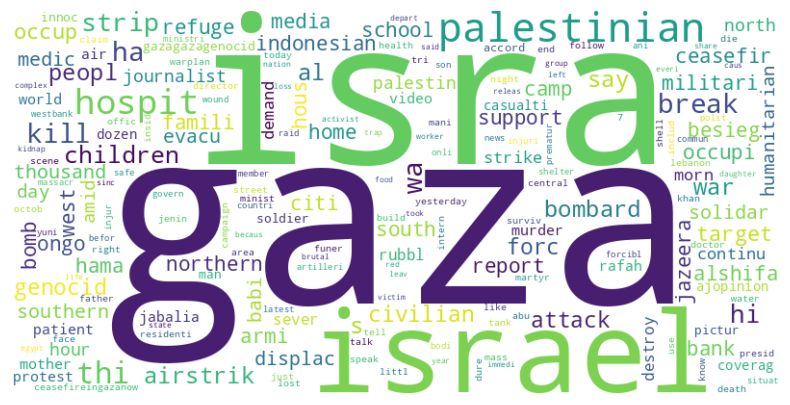

In [85]:
createCloud(vectorizer,all_text_pal)

In [86]:
# Initialize the WordNet Lemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def custom_tokenizer_lem(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return lemmatized_words

vectorizer = CountVectorizer(stop_words='english', tokenizer= custom_tokenizer_lem)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


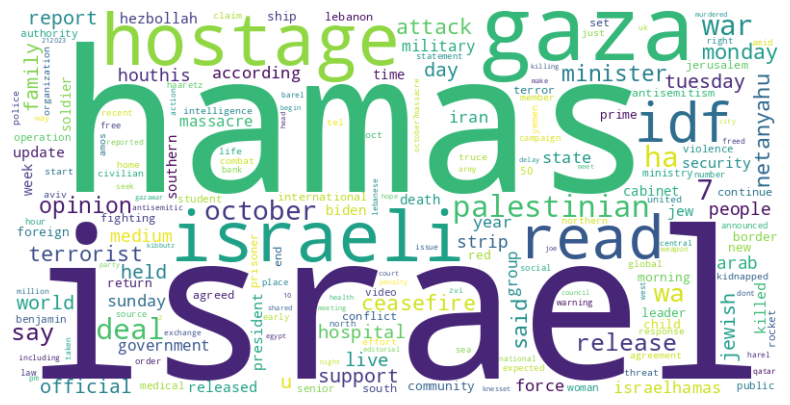

In [87]:
createCloud(vectorizer,all_text_isr)

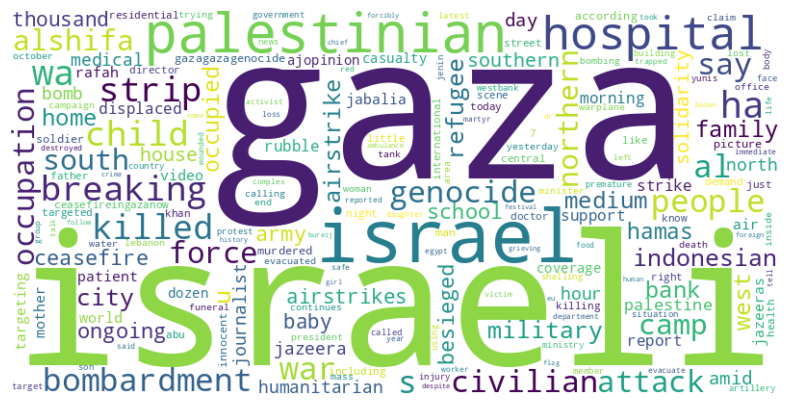

In [88]:
createCloud(vectorizer,all_text_pal)